## Data analysis and Visualization in understanding U.S Freight Network

## Loading the Spacy for NER

In [34]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 330.3 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 901.1 kB/s eta 0:00:15
     --- ------------------------------------ 1.0/12.8 MB 6.0 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.8 MB 11.6 MB/s eta 0:00:01
     ------------- -------------------------- 4.2/12.8 MB 15.8 MB/s eta 0:00:01
     ------------------- -------------------- 6.2/12.8 MB 19.8 MB/s eta 0:00:01
     ------------------------ --------------- 7.7/12.8 MB 21.5 MB/s eta 0:00:01
     ------------------------------ --------- 9.8/12.8 MB 24.0 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 38.5 MB/s eta 0:00:01
     --------------------------------------  12.8/12.8 MB 38.5 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB

In [35]:
!pip install folium geopy


## Loading the dataset

In [36]:
import pandas as pd
import spacy

# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Load your dataset
dataset = pd.read_csv("C:\\Users\\pbhar\\OneDrive\\Desktop\\New Folder\\T_T100D_MARKET_US_CARRIER_ONLY.csv")

dataset.head()

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,AIRLINE_ID,UNIQUE_CARRIER_NAME,UNIQUE_CARRIER_ENTITY,REGION,CARRIER,...,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS
0,0.0,0.0,0.0,0.0,3FQ,21979,"Western Air Charter, Inc. d/b/a Jet Edge",01235,D,3FQ,...,"Van Nuys, CA",CA,6,California,91,2024,1,1,1,L
1,0.0,0.0,0.0,0.0,5Y,20007,Atlas Air Inc.,06087,D,5Y,...,"Dallas/Fort Worth, TX",TX,48,Texas,74,2024,1,3,1,P
2,0.0,0.0,0.0,0.0,5Y,20007,Atlas Air Inc.,06087,D,5Y,...,"El Paso, TX",TX,48,Texas,74,2024,1,3,1,L
3,0.0,0.0,0.0,0.0,5Y,20007,Atlas Air Inc.,06087,D,5Y,...,"Baltimore, MD",MD,24,Maryland,35,2024,1,2,1,P
4,0.0,0.0,0.0,0.0,5Y,20007,Atlas Air Inc.,06087,D,5Y,...,"Baltimore, MD",MD,24,Maryland,35,2024,1,3,1,L


# Performing the NER

In [37]:
# Extract some sample text data from the dataset
sample_texts = dataset[['UNIQUE_CARRIER_NAME', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_STATE_NM']].head(10).apply(lambda x: ' '.join(x), axis=1)

# Perform NER on the sample texts
ner_results = []
for text in sample_texts:
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    ner_results.append(entities)

# Print the results
for i, (text, entities) in enumerate(zip(sample_texts, ner_results)):
    print(f"Sample Text {i+1}: {text}")
    for entity in entities:
        print(f"  - Entity: {entity[0]}, Label: {entity[1]}")
    print()


Sample Text 1: Western Air Charter, Inc.  d/b/a  Jet Edge Van Nuys, CA Van Nuys, CA California California
  - Entity: CA Van Nuys, Label: PERSON
  - Entity: California, Label: GPE
  - Entity: California, Label: GPE

Sample Text 2: Atlas Air Inc. Dallas/Fort Worth, TX Dallas/Fort Worth, TX Texas Texas
  - Entity: Atlas Air Inc., Label: ORG
  - Entity: Dallas, Label: GPE
  - Entity: Fort Worth, Label: GPE
  - Entity: TX Dallas/Fort Worth, Label: ORG
  - Entity: TX, Label: ORG
  - Entity: Texas, Label: GPE
  - Entity: Texas, Label: GPE

Sample Text 3: Atlas Air Inc. El Paso, TX El Paso, TX Texas Texas
  - Entity: Atlas Air Inc., Label: ORG
  - Entity: El Paso, Label: GPE
  - Entity: TX El Paso, Label: GPE
  - Entity: TX, Label: ORG
  - Entity: Texas, Label: GPE
  - Entity: Texas, Label: GPE

Sample Text 4: Atlas Air Inc. Baltimore, MD Baltimore, MD Maryland Maryland
  - Entity: Atlas Air Inc., Label: ORG
  - Entity: Baltimore, Label: GPE
  - Entity: MD Baltimore, Label: GPE
  - Entity: MD

## Extract some sample text data from the dataset

In [38]:
import spacy
from spacy import displacy

# Load the spaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Extract some sample text data from the dataset
sample_texts = dataset[['UNIQUE_CARRIER_NAME', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_STATE_NM']].head(10).apply(lambda x: ' '.join(x), axis=1)

# Perform NER on the sample texts and visualize the results
for text in sample_texts:
    doc = nlp(text)
    displacy.render(doc, style='ent', jupyter=True)


## Create a bar plot for entity counts

C:\Users\pbhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


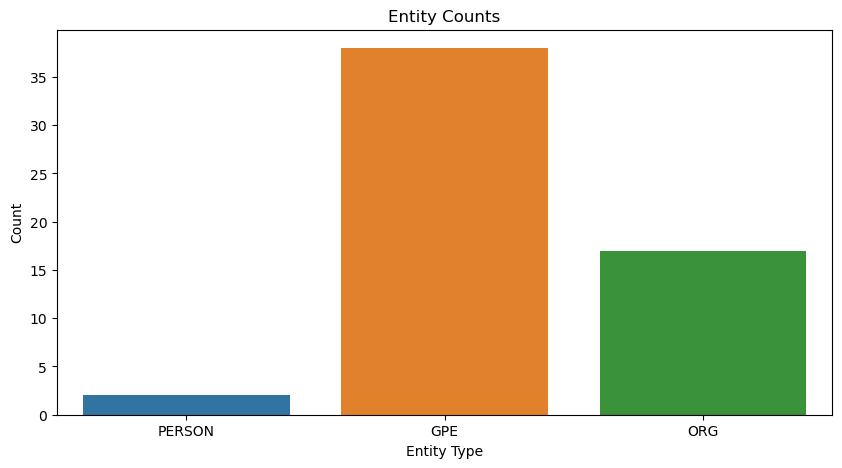

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extract entities from the sample texts
entities = []
for text in sample_texts:
    doc = nlp(text)
    entities.extend([(ent.text, ent.label_) for ent in doc.ents])

# Count the frequency of each entity type
entity_counts = Counter([label for _, label in entities])

# Create a bar plot for entity counts
plt.figure(figsize=(10, 5))
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title('Entity Counts')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.show()


## Create a line plot for cumulative entity counts

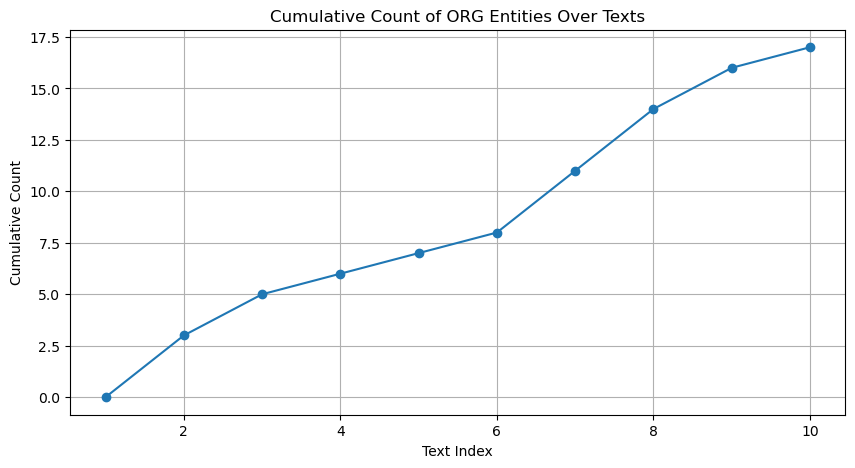

In [40]:
import spacy
import matplotlib.pyplot as plt
from collections import Counter

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Count the frequency of each entity type cumulatively
entity_type = 'ORG'  # Specify the entity type to plot
cumulative_counts = []
count = 0
for i, text in enumerate(sample_texts):
    doc = nlp(text)
    count += sum(1 for ent in doc.ents if ent.label_ == entity_type)
    cumulative_counts.append(count)

# Create a line plot for cumulative entity counts
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_counts) + 1), cumulative_counts, marker='o')
plt.title(f'Cumulative Count of {entity_type} Entities Over Texts')
plt.xlabel('Text Index')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()

## Create a box plot for entity counts

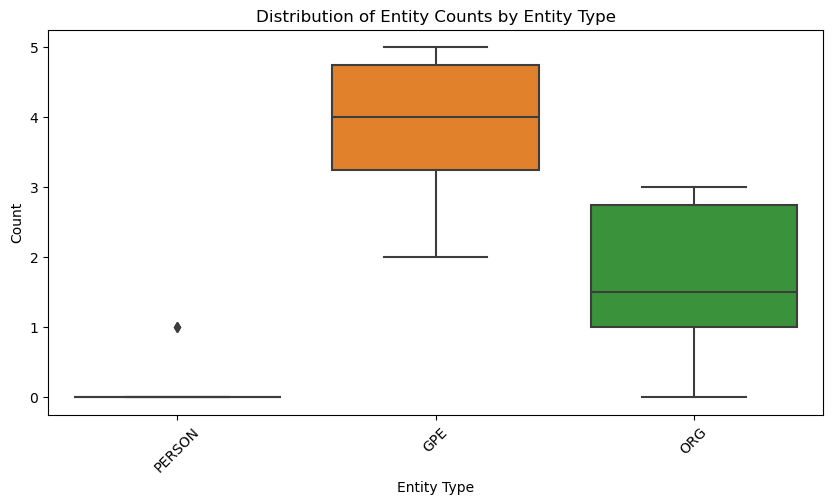

In [41]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Extract entities from the sample texts
entities = []
for text in sample_texts:
    doc = nlp(text)
    entities.extend([(ent.text, ent.label_) for ent in doc.ents])

# Create a DataFrame for entity counts per text
entity_counts = []
for text in sample_texts:
    doc = nlp(text)
    counts = Counter([ent.label_ for ent in doc.ents])
    entity_counts.append(counts)

# Convert to a DataFrame
df = pd.DataFrame(entity_counts).fillna(0)

# Create a box plot for entity counts
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Distribution of Entity Counts by Entity Type')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Create a graph for entity relationships

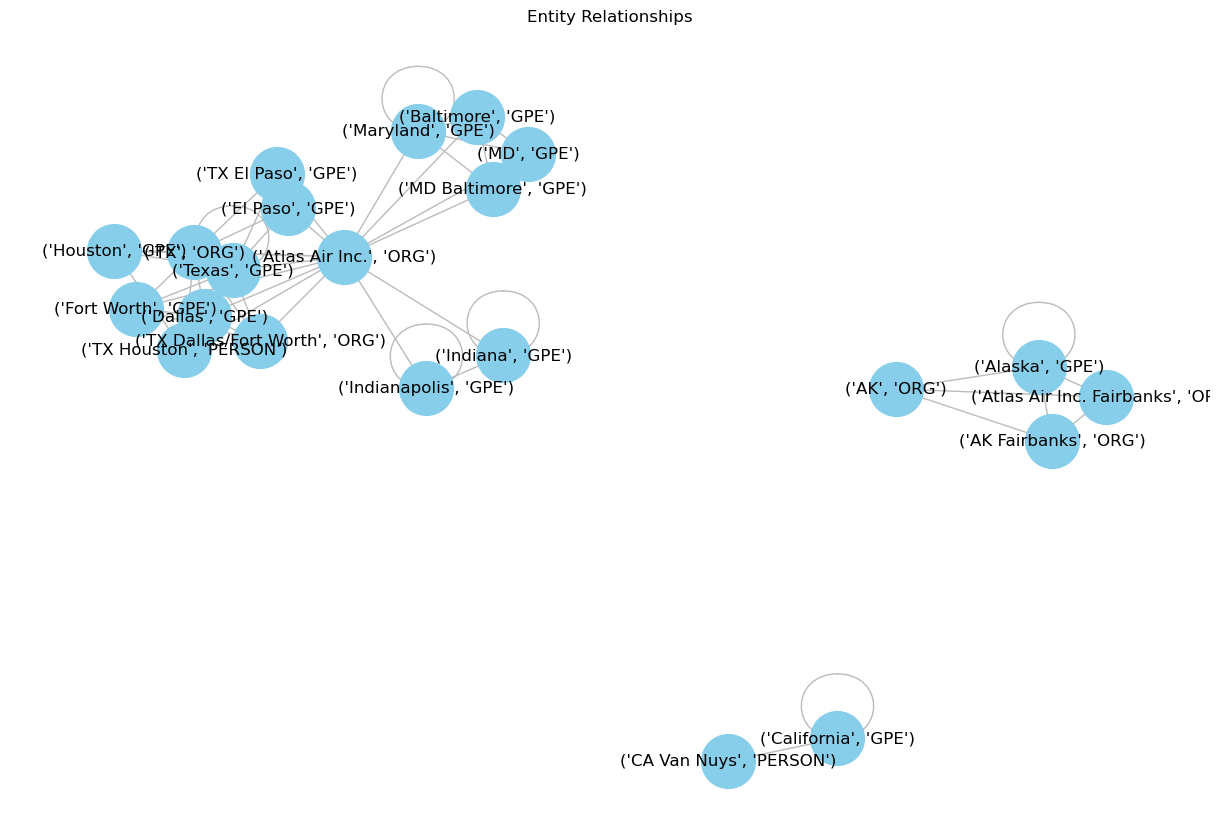

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph for entity relationships
G = nx.Graph()

# Add nodes and edges
for text in sample_texts:
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    for i in range(len(entities) - 1):
        for j in range(i + 1, len(entities)):
            G.add_edge(entities[i], entities[j])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='#bbbbbb')
plt.title('Entity Relationships')
plt.show()

# Wordcloud

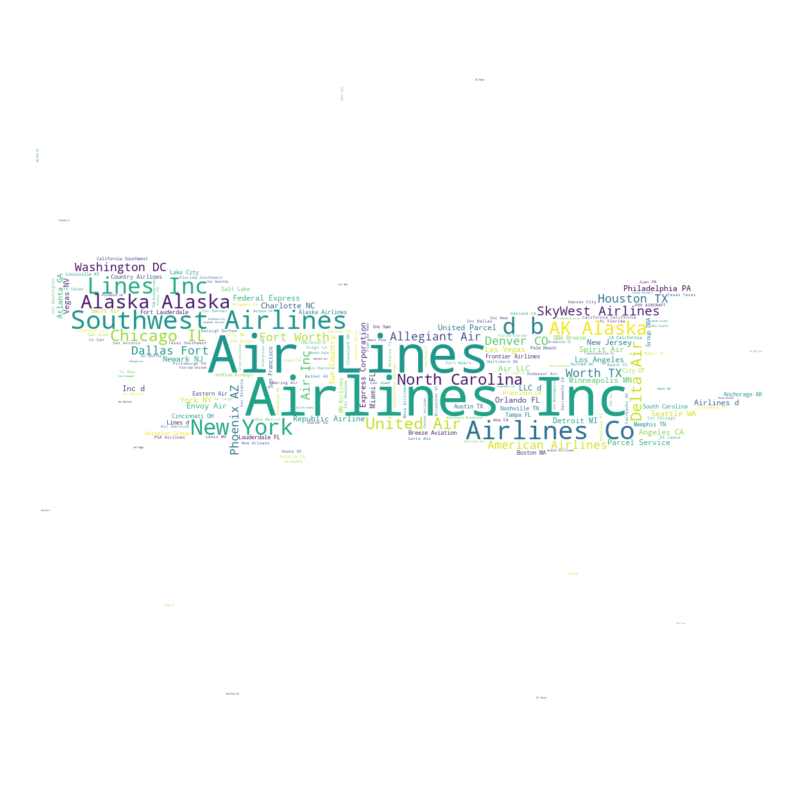

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual CSV file path)
file_path = "C:\\Users\\pbhar\\OneDrive\\Desktop\\New Folder\\T_T100D_MARKET_US_CARRIER_ONLY.csv"
dataset = pd.read_csv(file_path)

# Combine relevant text data into a single text
text_data = dataset[['UNIQUE_CARRIER_NAME', 'ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_STATE_NM']].astype(str).apply(' '.join, axis=1).str.cat(sep=' ')

# Load airplane silhouette image with transparent background (PNG format)
airplane_mask = np.array(Image.open("C:\\Users\\pbhar\\Downloads\\WhatsApp Image 2024-06-22 at 13.10.18_7aba8ebf.jpg"))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=airplane_mask, contour_width=0).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Initialize the map and add markers and routes to the map

In [44]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Extract the relevant columns for visualization
sample_data = dataset[['ORIGIN_CITY_NAME', 'DEST_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST_STATE_NM']].head(50)

# Function to get coordinates for a city
def get_coordinates(city):
    try:
        geolocator = Nominatim(user_agent="freight_analysis")
        location = geolocator.geocode(city)
        return (location.latitude, location.longitude)
    except (GeocoderTimedOut, AttributeError):
        return None

# Initialize the map
map_freight = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers and routes to the map
marker_cluster = MarkerCluster().add_to(map_freight)
for _, row in sample_data.iterrows():
    origin = f"{row['ORIGIN_CITY_NAME']}, {row['ORIGIN_STATE_NM']}"
    destination = f"{row['DEST_CITY_NAME']}, {row['DEST_STATE_NM']}"
    
    origin_coords = get_coordinates(origin)
    destination_coords = get_coordinates(destination)
    
    if origin_coords and destination_coords:
        # Add origin marker with different color
        folium.Marker(location=origin_coords, popup=f"Origin: {origin}", icon=folium.Icon(color='green')).add_to(marker_cluster)
        # Add destination marker with different color
        folium.Marker(location=destination_coords, popup=f"Destination: {destination}", icon=folium.Icon(color='red')).add_to(marker_cluster)
        # Add dotted line between origin and destination
        folium.PolyLine(locations=[origin_coords, destination_coords], color='blue', dash_array='5, 10').add_to(map_freight)

# Save the map to an HTML file in the current directory
map_freight.save('freight_map_with_routes.html')


## Heatmap of freight volume by origin and destination

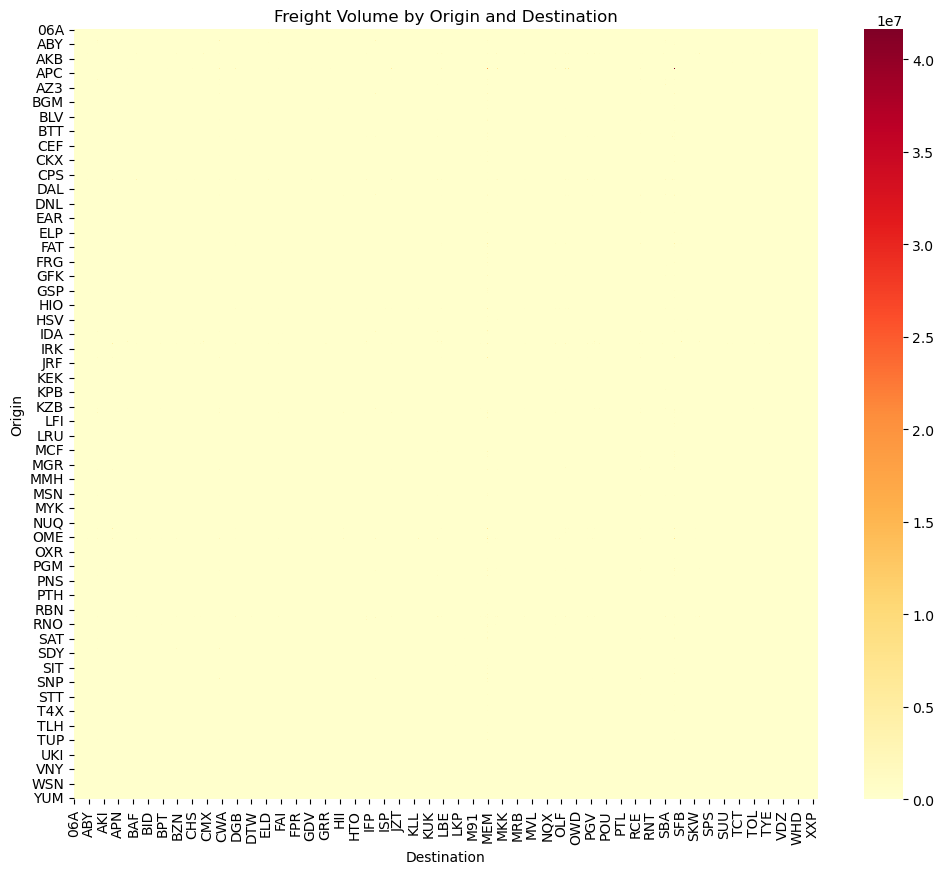

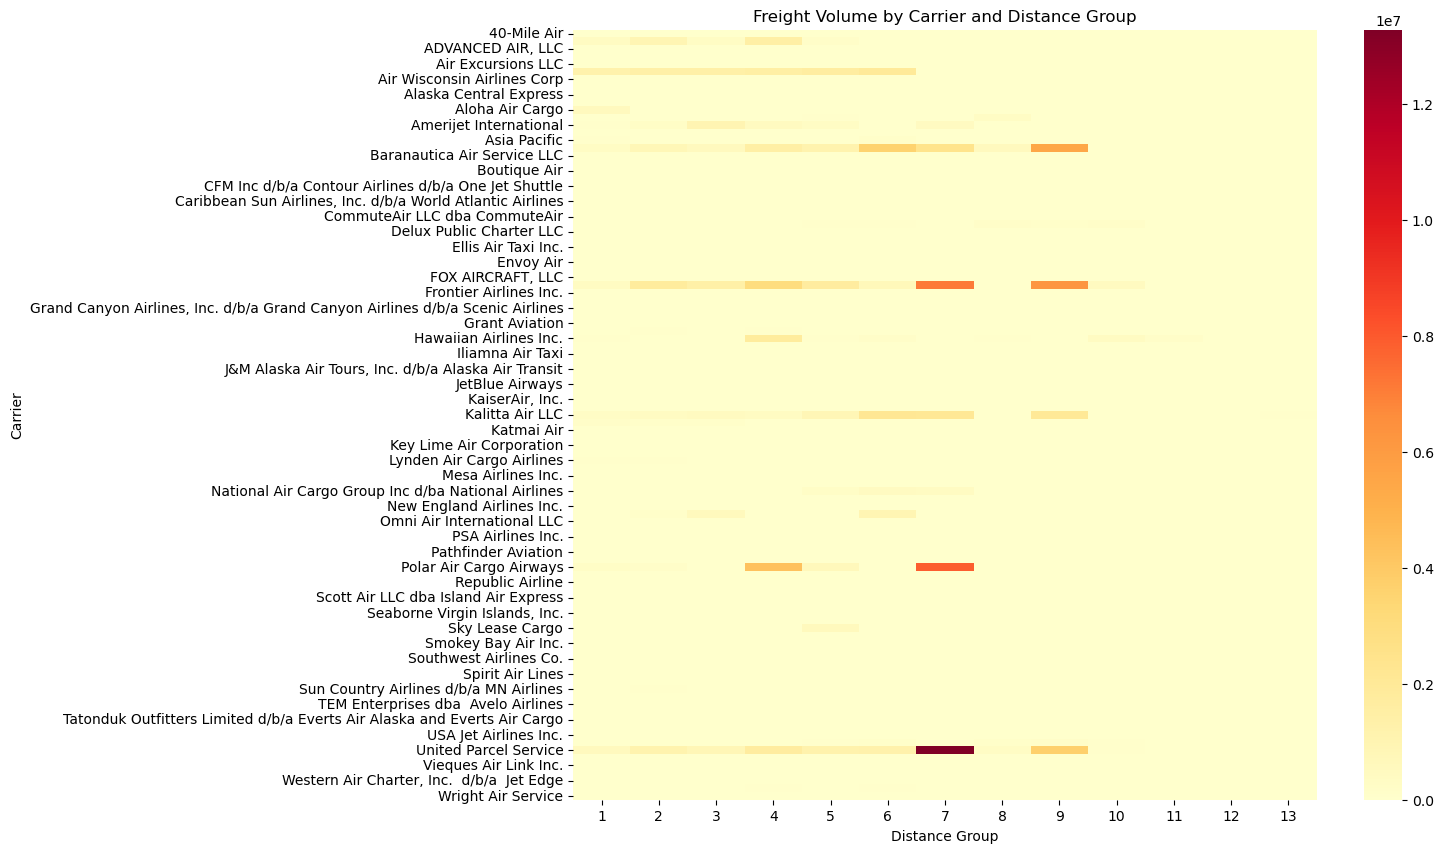

In [45]:
# Visualizations
# Heatmap of freight volume by origin and destination
freight_pivot = dataset.pivot_table(index='ORIGIN', columns='DEST', values='FREIGHT', fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(freight_pivot, cmap='YlOrRd')
plt.title('Freight Volume by Origin and Destination')
plt.xlabel('Destination')
plt.ylabel('Origin')
plt.show()

# Heatmap of freight volume by carrier and distance group
freight_by_carrier_distance = dataset.pivot_table(index='UNIQUE_CARRIER_NAME', columns='DISTANCE_GROUP', values='FREIGHT', fill_value=0)
plt.figure(figsize=(12, 10))
sns.heatmap(freight_by_carrier_distance, cmap='YlOrRd')
plt.title('Freight Volume by Carrier and Distance Group')
plt.xlabel('Distance Group')
plt.ylabel('Carrier')
plt.show()